In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import yfinance as yf
import math
import os.path
import time

In [2]:
cryptocurrencies = ['ADA-USD']
cardano_df = yf.download(cryptocurrencies, start='2019-01-01',
                end='2022-03-01', parse_dates = ['Month'])

[*********************100%***********************]  1 of 1 completed


In [3]:
cardano_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,0.043232,0.043364,0.040493,0.041063,0.041063,19280457
2019-01-01,0.040984,0.042547,0.040308,0.042547,0.042547,14962902
2019-01-02,0.042568,0.045563,0.041982,0.045258,0.045258,24151526
2019-01-03,0.045106,0.045259,0.042535,0.042682,0.042682,21126963
2019-01-04,0.042629,0.044092,0.042477,0.043812,0.043812,16024029
...,...,...,...,...,...,...
2022-02-24,0.868515,0.882342,0.752810,0.853425,0.853425,3629367685
2022-02-25,0.853572,0.906541,0.829244,0.898027,0.898027,1652894219
2022-02-26,0.897996,0.928296,0.885401,0.887918,0.887918,1099934921


In [4]:
cardano_df['Close'].max()

2.9682390689849854

In [5]:
cardano_df['Close'].min()

0.02396100014448166

In [6]:
cardano_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1.156000e+03
mean,0.575260,0.600385,0.548764,0.576098,0.576098,1.584145e+09
std,0.753889,0.785826,0.719761,0.753961,0.753961,2.476968e+09
min,0.023954,0.025993,0.019130,0.023961,0.023961,1.101152e+07
25%,0.049002,0.050907,0.047481,0.049085,0.049085,8.332471e+07
50%,0.096648,0.099720,0.093302,0.096611,0.096611,3.720917e+08
75%,1.194753,1.244208,1.156850,1.195498,1.195498,2.147296e+09
max,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10


In [7]:
cardano_df["Volume"] = cardano_df["Volume"].astype("float")
cardano_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2018-12-31 to 2022-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1156 non-null   float64
 1   High       1156 non-null   float64
 2   Low        1156 non-null   float64
 3   Close      1156 non-null   float64
 4   Adj Close  1156 non-null   float64
 5   Volume     1156 non-null   float64
dtypes: float64(6)
memory usage: 63.2 KB


In [8]:
cardano_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,0.043232,0.043364,0.040493,0.041063,0.041063,19280457.0
2019-01-01,0.040984,0.042547,0.040308,0.042547,0.042547,14962902.0
2019-01-02,0.042568,0.045563,0.041982,0.045258,0.045258,24151526.0
2019-01-03,0.045106,0.045259,0.042535,0.042682,0.042682,21126963.0
2019-01-04,0.042629,0.044092,0.042477,0.043812,0.043812,16024029.0


In [9]:
cardano_df = cardano_df.drop(columns = ['Adj Close'])

In [10]:
cardano_df.info()
print('\n')
print('Número de muestras', cardano_df.shape[0])
print('Número de variables', cardano_df.shape[1])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2018-12-31 to 2022-02-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1156 non-null   float64
 1   High    1156 non-null   float64
 2   Low     1156 non-null   float64
 3   Close   1156 non-null   float64
 4   Volume  1156 non-null   float64
dtypes: float64(5)
memory usage: 54.2 KB


Número de muestras 1156
Número de variables 5


In [11]:
close = cardano_df['Close']

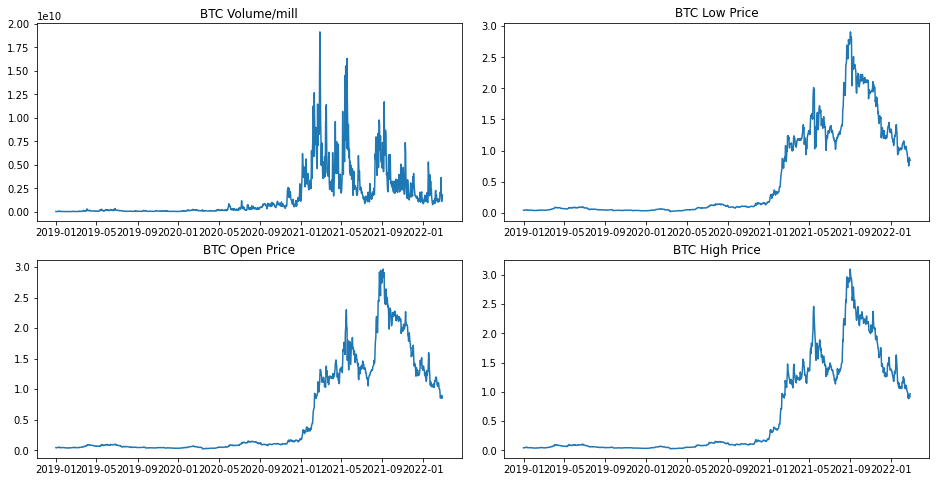

In [12]:
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(cardano_df['Volume'])
axs[0,0].set_title('BTC Volume/mill')
axs[0,1].plot(cardano_df['Low'])
axs[0,1].set_title('BTC Low Price')
axs[1,0].plot(cardano_df['Open'])
axs[1,0].set_title('BTC Open Price')
axs[1,1].plot(cardano_df['High'])
axs[1,1].set_title('BTC High Price')

plt.show()

In [13]:
""" Vamos a medir la correlación entre las variables
 y comprobaremos a continuación cuáles son las más importantes 
 intentando conocer qué variables independientes
 afectan en mayor medida al modelo que vamos a utilizar. """

cardano_features = cardano_df
features = ['Open', 'High', 'Low', 'Volume']
X_cardano = cardano_features[features]
y_cardano = cardano_features['Close']  

In [14]:
cardano_df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.998453,0.997426,0.997128,0.666252
High,0.998453,1.000000,0.996886,0.998951,0.686186
Low,0.997426,0.996886,1.000000,0.998088,0.645962
Close,0.997128,0.998951,0.998088,1.000000,0.673916
Volume,0.666252,0.686186,0.645962,0.673916,1.000000


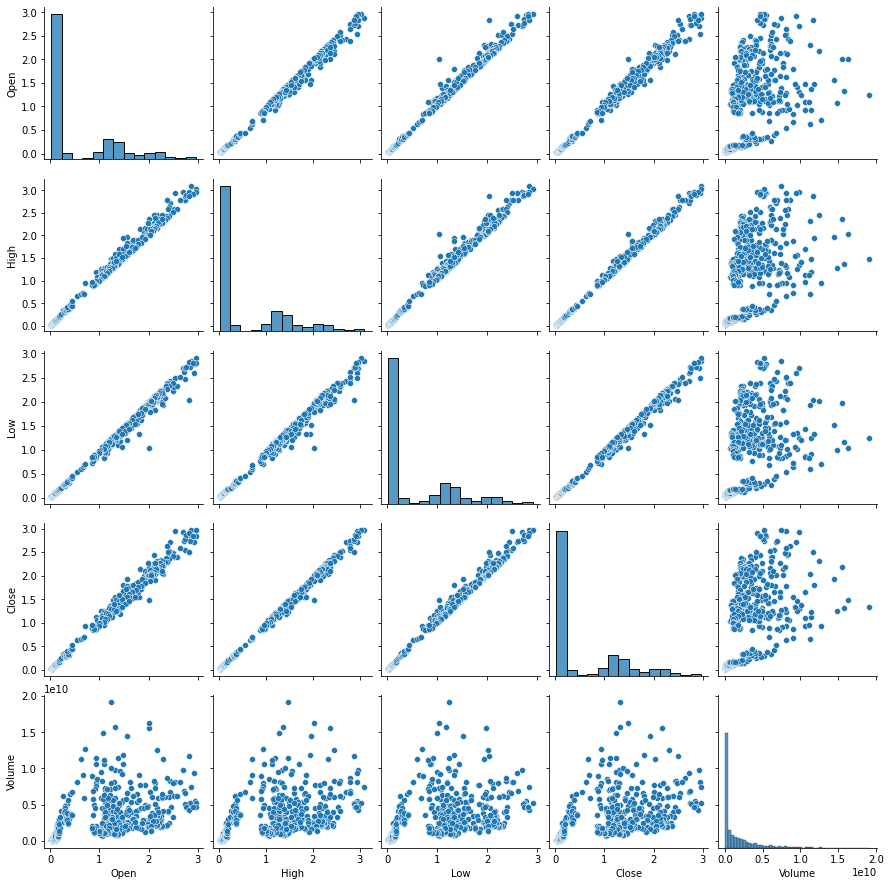

In [15]:
sns.pairplot(cardano_df);

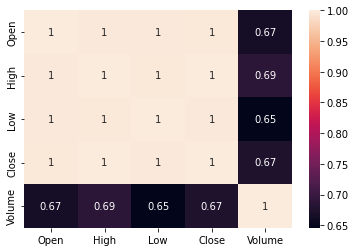

In [16]:
sns.heatmap(cardano_df.corr(), annot=True);

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


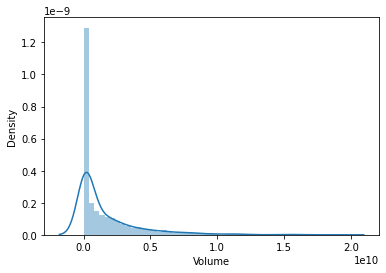

In [17]:
sns.distplot(cardano_df['Volume']);

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


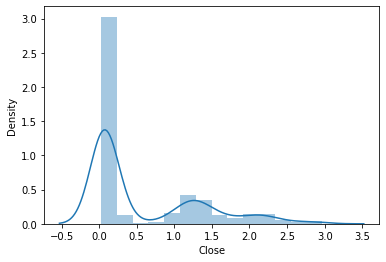

In [18]:
sns.distplot(cardano_df['Close']);

## 1). MODELO DE REGRESIÓN LINEAL.

In [19]:
X_cardano.columns


Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cardano, y_cardano, test_size = 0.30, random_state = 42)

In [21]:
print("Total features shape:", X_cardano.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (1156, 4)
Train features shape: (809, 4)
Train target shape: (809,)
Test features shape: (347, 4)
Test target shape: (347,)


In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)

Intercepto: 0.0001258935347316914
Coeficientes: [-4.78440712e-01  9.02346869e-01  5.62192620e-01  7.34634575e-13]


In [24]:
coeff_df = pd.DataFrame(lm.coef_,
                        X_cardano.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Open,-4.784407e-01
High,9.023469e-01
Low,5.621926e-01
Volume,7.346346e-13


In [25]:
X_test

,Open,High,Low,Volume
Date,,,,
2021-07-28,1.280826,1.316583,1.260048,1.793329e+09
2019-09-22,0.051894,0.051954,0.047857,8.615202e+07
2019-04-19,0.081739,0.081782,0.078210,8.264674e+07
2019-10-26,0.041220,0.043177,0.039668,1.228611e+08
2021-01-21,0.375449,0.378716,0.301401,3.567903e+09
...,...,...,...,...
2020-10-15,0.107217,0.107591,0.104979,5.621973e+08
2021-05-22,1.553113,1.601020,1.377943,6.572398e+09
2020-06-28,0.077679,0.081413,0.076251,1.888714e+08


In [26]:
predictions = lm.predict(X_test)
predictions

array([1.28504833, 0.04914636, 0.07884416, 0.04175652, 0.33429551,
       0.09020114, 1.69935232, 0.09157682, 1.30126487, 0.13119238,
       0.03352711, 0.04249175, 0.08217221, 1.45460536, 0.0631213 ,
       1.37321255, 0.43601556, 2.45228087, 3.02558402, 2.5958365 ,
       1.84342794, 1.3184763 , 0.04737604, 0.09376547, 0.34665333,
       0.13697645, 0.04867432, 0.0318198 , 0.04212695, 1.10915168,
       0.05278724, 0.03340486, 0.04570709, 0.03859305, 2.29718354,
       0.0826831 , 0.94314642, 1.17844289, 1.18626896, 0.03919132,
       1.27782401, 1.43067693, 2.15412059, 0.09551242, 0.10022466,
       0.03499427, 1.5595579 , 1.3186449 , 0.04100327, 2.427866  ,
       2.37717615, 0.11613411, 0.08389501, 0.06654036, 0.04541302,
       0.63621872, 0.05884005, 0.02858346, 0.04652437, 0.04310909,
       0.04141314, 0.07933585, 1.95873144, 0.05777907, 0.08596309,
       0.10561766, 0.14594359, 1.02676254, 1.18275008, 0.17713308,
       0.06620254, 0.08564694, 1.0623492 , 0.04389148, 0.03698

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


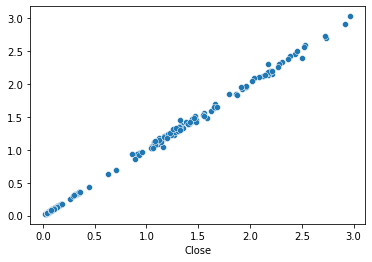

In [27]:
sns.scatterplot(y_test, predictions);

In [28]:
new_price = np.array([[1.5, 0.75, 2.20, 0.17],
                    [2, 0.60, 1.90, 0.01]])

lm.predict(new_price)

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.19604874, 0.65281857])

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

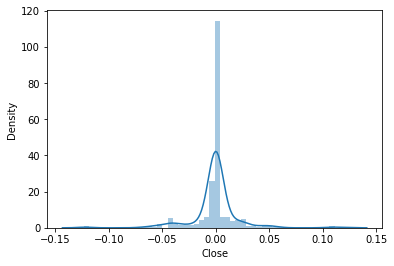

In [29]:
sns.distplot((y_test - predictions))

In [30]:
from sklearn import metrics

lm.score(X_test, y_test)


0.9991589799134898

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.010007267318704929
MSE: 0.00047030234501160633
RMSE: 0.021686455335337914


In [32]:
intercept = lm.intercept_
features = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=True)

,coefficient
Open,-4.784407e-01
Volume,7.346346e-13
Low,5.621926e-01
High,9.023469e-01


In [33]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scal = std_scale.transform(X_train)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scal, y_train)

intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['Coefficient'])

features_std.sort_values('Coefficient', ascending=False)

,Coefficient
High,0.709959
Low,0.405932
Volume,0.001764
Open,-0.361392


In [34]:
cardano_df.describe()

,Open,High,Low,Close,Volume
count,1156.000000,1156.000000,1156.000000,1156.000000,1.156000e+03
mean,0.575260,0.600385,0.548764,0.576098,1.584145e+09
std,0.753889,0.785826,0.719761,0.753961,2.476968e+09
min,0.023954,0.025993,0.019130,0.023961,1.101152e+07
25%,0.049002,0.050907,0.047481,0.049085,8.332471e+07
50%,0.096648,0.099720,0.093302,0.096611,3.720917e+08
75%,1.194753,1.244208,1.156850,1.195498,2.147296e+09
max,2.966390,3.099186,2.907606,2.968239,1.914198e+10


In [35]:
X = cardano_df[['Open', 'High', 'Low', 'Volume']]

y = cardano_df['Close']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

lr = LinearRegression(n_jobs=-1) 
lr.fit(X_train, y_train)

predictions = lm.predict(X_test)
predictions
lr.fit(X, y)

# A little bit lower without Avg. Area Number of Bedrooms
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.010007267318704929
MSE: 0.00047030234501160633
RMSE: 0.021686455335337914


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [37]:
# Load libraries
import numpy as np
import pickle
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Set random seed
np.random.seed(42)

In [38]:
def my_function(df):
    df['columna1'] = SimpleImputer(strategy='mean')
    df['columna2'] = SimpleImputer(strategy='median')
    return df

In [39]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)
}

In [40]:
def preprocessing(df):
    df = imputacion(df)
    df = estandarizar(df)
    modelo.fit(df)
    return model

In [41]:
cardano_df

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,0.043232,0.043364,0.040493,0.041063,1.928046e+07
2019-01-01,0.040984,0.042547,0.040308,0.042547,1.496290e+07
2019-01-02,0.042568,0.045563,0.041982,0.045258,2.415153e+07
2019-01-03,0.045106,0.045259,0.042535,0.042682,2.112696e+07
2019-01-04,0.042629,0.044092,0.042477,0.043812,1.602403e+07
...,...,...,...,...,...
2022-02-24,0.868515,0.882342,0.752810,0.853425,3.629368e+09
2022-02-25,0.853572,0.906541,0.829244,0.898027,1.652894e+09
2022-02-26,0.897996,0.928296,0.885401,0.887918,1.099935e+09


In [42]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    # ("funcion", my_function())
    ("reglog", LogisticRegression())
])

rand_forest = RandomForestClassifier()

svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])


reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)
}
rand_forest_param = {
    "n_estimators": [10, 100, 1000],
    "max_features": [1,2,3]
}
svm_param = {
    'selectkbest__k': [2, 3, 4],
    'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'svm__degree': [1,2,3,4],
    'svm__gamma': ['scale', 'auto']
}


gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

grids = {"gs_reg_log": gs_reg_log,
        "gs_rand_forest": gs_rand_forest,
        "gs_svm": gs_svm}

LogisticRegression(C=1, penalty='l2', solver='liblinear')

LogisticRegression(C=1, solver='liblinear')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [44]:
print(gs_reg_log.best_score_)
print(gs_reg_log.best_params_)
print(gs_reg_log.best_estimator_)
print(gs_reg_log.best_estimator_['reglog'])

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [45]:
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [46]:
def rmse(x, y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train),
                m.score(X_test, y_test)]
    print(f"RMSE Training Set: {res[0]} \nRMSE validation set: {res[1]} \nR2 validation set: {res[3]}")

In [47]:
modelo_defecto  = RandomForestRegressor(random_state = 42)
modelo_defecto.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
print_score(modelo_defecto)

RMSE Training Set: 0.01329181959212702 
RMSE validation set: 0.026153998783584098 
R2 validation set: 0.9987767776079467


In [49]:
modelo_defecto_modificado = RandomForestRegressor(n_estimators = 40,
                                                  min_samples_leaf = 30,
                                                  random_state = 42)

modelo_defecto_modificado.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=40, random_state=42)

In [50]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [51]:
def reg_accuracy(y_true, y_pre):
    return_var = []
    from math import sqrt
    rmse = sqrt(mean_squared_error(y_true, y_pre))
    return_var.append(rmse)
    print ("RMSE: ", rmse)
    r2 = r2_score(y_true, y_pre)
    return_var.append(r2)
    print("R2: ", r2)
    mae = mean_absolute_error(y_true, y_pre)
    return_var.append(mae)
    print("MAE: " , mae)

    if 0 in y_true:
        print("MAPE erróneo")
        return_var.append(0)

    else:
        mape = round(np.mean(np.abs((y_true - y_pre) / y_true))*100,4)
        print('MAPE :', mape)
        print('======================')
        print('Model Accuracy(%) :', 100 - mape)
        print('======================')
        return_var.append(mape)
        return_var.append(100-mape)
    return return_var

In [52]:
random_tree = [i*10 for i in range(1,50)]
rmse, r_sq, mae, mape = [], [], [], []
for tree_size in random_tree:
    print('Tree Size: ', tree_size)
    model = RandomForestRegressor(random_state=42, n_estimators=int(tree_size)).fit(X_train, y_train)
    estimation = model.predict(X_test)
    result = reg_accuracy(y_test, estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    mape.append(result[3])

Tree Size:  10
RMSE:  0.028551723186518562
R2:  0.9985422136714339
MAE:  0.01403034114109766
MAPE : 2.493
Model Accuracy(%) : 97.507
Tree Size:  20
RMSE:  0.026356389550946175
R2:  0.9987577727270919
MAE:  0.012863438908998411
MAPE : 2.3704
Model Accuracy(%) : 97.6296
Tree Size:  30
RMSE:  0.02615171468731092
R2:  0.9987769912529597
MAE:  0.01251318503983541
MAPE : 2.3602
Model Accuracy(%) : 97.6398
Tree Size:  40
RMSE:  0.025850238000810665
R2:  0.9988050263852228
MAE:  0.012288321284120982
MAPE : 2.3101
Model Accuracy(%) : 97.6899
Tree Size:  50
RMSE:  0.02564986290813327
R2:  0.9988234799825794
MAE:  0.01220944110411474
MAPE : 2.3138
Model Accuracy(%) : 97.6862
Tree Size:  60
RMSE:  0.026063897555101766
R2:  0.9987851911584956
MAE:  0.012402992718293902
MAPE : 2.3273
Model Accuracy(%) : 97.6727
Tree Size:  70
RMSE:  0.026076511485813164
R2:  0.9987840150318231
MAE:  0.01238307632443013
MAPE : 2.3255
Model Accuracy(%) : 97.6745
Tree Size:  80
RMSE:  0.02629609380212731
R2:  0.9987634

## A continuación vemos cual de todos los árboles estudiados y aquel que tiene un menor RMSE y un mayor R2 es aquel que tiene 50 estimadores junto con el de 120.

### Tree Size:  50 
### RMSE:  0.02564986290813327
### R2:  0.9988234799825794 
### MAE:   0.01220944110411474
### MAPE : 2.3138
======================
## Model Accuracy(%) : 97.6862

### Tree Size:  120
### RMSE:  0.02591512866250471
### R2:  0.9987990194808058
### MAE:   0.012245433694861045
### MAPE : 2.2961
======================
## Model Accuracy(%) : 97.7039

## Vamos a ver a continuación la métrica RMSE:

<AxesSubplot:title={'center':'RMSE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='RMSE'>

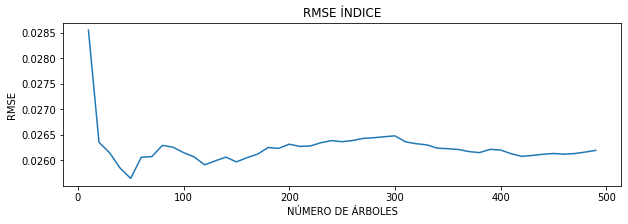

In [53]:
plt.figure(figsize=(10,3))
plt.title('RMSE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('RMSE')
sns.lineplot(x = random_tree, y = rmse)

## MAE:

<AxesSubplot:title={'center':'MAE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='MAE'>

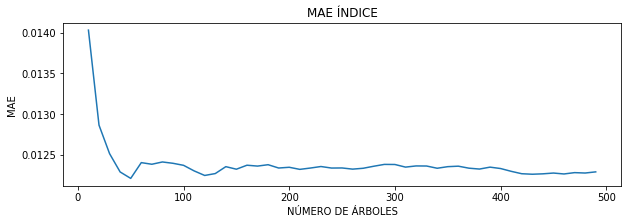

In [54]:
plt.figure(figsize=(10,3))
plt.title('MAE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('MAE')
sns.lineplot(x = random_tree, y = mae)

## MAPE:

<AxesSubplot:title={'center':'MAPE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='MAPE'>

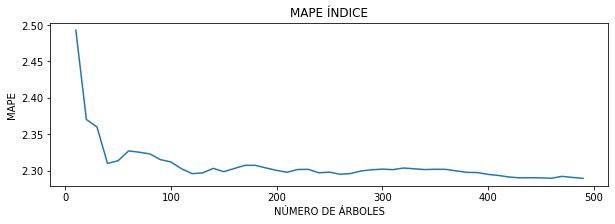

In [55]:
plt.figure(figsize=(10,3))
plt.title('MAPE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('MAPE')
sns.lineplot(x = random_tree, y = mape)

## R2 Square:

<AxesSubplot:title={'center':'R2 ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='r2'>

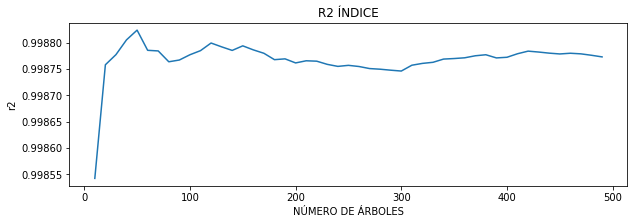

In [56]:
plt.figure(figsize=(10,3))
plt.title('R2 ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('r2')
sns.lineplot(x = random_tree, y = r_sq)

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [58]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500)]

max_features = ['auto', 'sqrt', None]

max_depth = [int(x) for x in np.linspace(5, 50, num = 45)]

max_depth.append(None)

min_samples_split = [2, 4, 6, 8, 10]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30]

bootstrap = [True]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' :  min_samples_leaf,
               'bootstrap' : bootstrap}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt', None], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, None], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30], 'bootstrap': [True]}


In [59]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring = 'neg_mean_squared_error',
                               cv= 3, verbose = 2, random_state = 42, n_jobs =-1,
                               return_train_score = False)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['auto', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12, 14, 16, 20, 25,
                                                             30],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_es

## Cv nos da el nº de particiones para la cross validation. Cuanto mayor es el nº de iteraciones(n_iter) mayor búsqueda de posibilidades.
## Cuanto mayor sea el cv, mayor reducción de overfitting.

## Con el parámetro "scoring" pretendemos que nos devuelva el menor RMSE posible.

In [60]:
first_grid = rf_random.best_params_
first_grid

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True],
              'max_depth': [10, 15, 20],
              'max_features': ['auto'],
              'min_samples_leaf': [2, 4, 6],
              'min_samples_split': [5, 7, 9],
              'n_estimators' : [30, 190, 250]}


rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid= param_grid,
                           cv = 3, n_jobs = -1, verbose = 2, return_train_score = False, scoring = 'neg_mean_squared_error')

In [62]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 81 candidates, totalling 243 fits


## Nos quedamos con el modelo seleccionado del GridSearch que es el SecondGrid

In [63]:
modelo_seleccionado = grid_search.best_params_ 
modelo_seleccionado 

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 30}

In [64]:
pred = modelo_seleccionado
pred

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 30}

In [65]:
# QUEREMOS SACAR LA GRÁFICA TANTO DE LA PREDICCIÓN COMO DE SU VALOR REAL DEL CLOSE.
# plt.plot[[cardano_df['Close'], y_test(figsize= (20,8))]] 

<AxesSubplot:xlabel='Date'>

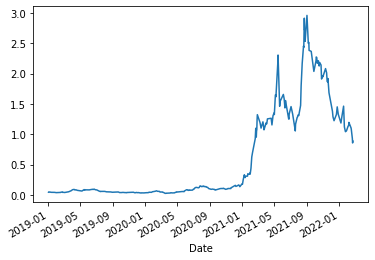

In [81]:
y_test.plot()

In [67]:
X_test

,Open,High,Low,Volume
Date,,,,
2021-07-28,1.280826,1.316583,1.260048,1.793329e+09
2019-09-22,0.051894,0.051954,0.047857,8.615202e+07
2019-04-19,0.081739,0.081782,0.078210,8.264674e+07
2019-10-26,0.041220,0.043177,0.039668,1.228611e+08
2021-01-21,0.375449,0.378716,0.301401,3.567903e+09
...,...,...,...,...
2020-10-15,0.107217,0.107591,0.104979,5.621973e+08
2021-05-22,1.553113,1.601020,1.377943,6.572398e+09
2020-06-28,0.077679,0.081413,0.076251,1.888714e+08


In [68]:
y_test

Date
2021-07-28    1.283504
2019-09-22    0.049111
2019-04-19    0.079500
2019-10-26    0.040547
2021-01-21    0.310209
                ...   
2020-10-15    0.106635
2021-05-22    1.463622
2020-06-28    0.080392
2021-11-24    1.686423
2021-09-07    2.502491
Name: Close, Length: 347, dtype: float64